In [891]:
# !pip install pyarrow

In [892]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [893]:
df = pd.read_parquet("../data/dataset.parquet")
df

,date,open,high,low,close,adj close,volume,close_percent_change,dividends_event_value,dividends_event_name,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
0,2014-08-06,23.687500,23.870001,23.677500,23.740000,20.998869,154232000,-0.005055,0.0000,None,...,NaN,NaN,NaN,NaN,NaN,2,6,8,2014,32
1,2014-08-07,23.732500,23.987499,23.525000,23.620001,20.996649,186844000,0.002752,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,3,7,8,2014,32
2,2014-08-08,23.565001,23.705000,23.320000,23.684999,21.054420,167460000,0.013194,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,4,8,8,2014,32
3,2014-08-11,23.817499,24.020000,23.709999,23.997499,21.332216,146340000,-0.000208,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,0,11,8,2014,33
4,2014-08-12,24.010000,24.219999,23.902500,23.992500,21.327774,135180000,0.013233,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,1,12,8,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800,0.014991,0.2500,dividends,...,48983000.0,45057100.0,77305800.0,78569700.0,163224100.0,1,30,7,2024,31
2512,2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300,-0.016751,0.2500,dividends,...,50759500.0,48983000.0,45057100.0,77305800.0,78569700.0,2,31,7,2024,31
2513,2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000,0.006869,0.2500,dividends,...,72044800.0,50759500.0,48983000.0,45057100.0,77305800.0,3,1,8,2024,31
2514,2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600,-0.048167,0.2500,dividends,...,52393600.0,72044800.0,50759500.0,48983000.0,45057100.0,4,2,8,2024,31


In [894]:
# target = "target_close"
target = "close_percent_change"

x = df.drop(columns=[target]).set_index("date")
y = df[["date", target]].set_index("date")
y

,close_percent_change
date,
2014-08-06,-0.005055
2014-08-07,0.002752
2014-08-08,0.013194
2014-08-11,-0.000208
2014-08-12,0.013233
...,...
2024-07-30,0.014991
2024-07-31,-0.016751
2024-08-01,0.006869


In [895]:
x

,open,high,low,close,adj close,volume,dividends_event_value,dividends_event_name,dividends_event_sentiment,dividends_event_decay,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
date,,,,,,,,,,,,,,,,,,,,,
2014-08-06,23.687500,23.870001,23.677500,23.740000,20.998869,154232000,0.0000,None,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2,6,8,2014,32
2014-08-07,23.732500,23.987499,23.525000,23.620001,20.996649,186844000,0.1175,dividends,1.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,3,7,8,2014,32
2014-08-08,23.565001,23.705000,23.320000,23.684999,21.054420,167460000,0.1175,dividends,1.0,0.980000,...,NaN,NaN,NaN,NaN,NaN,4,8,8,2014,32
2014-08-11,23.817499,24.020000,23.709999,23.997499,21.332216,146340000,0.1175,dividends,1.0,0.960400,...,NaN,NaN,NaN,NaN,NaN,0,11,8,2014,33
2014-08-12,24.010000,24.219999,23.902500,23.992500,21.327774,135180000,0.1175,dividends,1.0,0.941192,...,NaN,NaN,NaN,NaN,NaN,1,12,8,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800,0.2500,dividends,1.0,0.335899,...,48983000.0,45057100.0,77305800.0,78569700.0,163224100.0,1,30,7,2024,31
2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300,0.2500,dividends,1.0,0.329181,...,50759500.0,48983000.0,45057100.0,77305800.0,78569700.0,2,31,7,2024,31
2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000,0.2500,dividends,1.0,0.322597,...,72044800.0,50759500.0,48983000.0,45057100.0,77305800.0,3,1,8,2024,31


In [896]:
table_info = pd.DataFrame()

# Print columns that are not int, float, bool or category
for col in x.columns:
    dtype = x[col].dtype
    if dtype not in ["int", "float64", "bool", "category"]:
        table_info = pd.concat([table_info, pd.DataFrame({"Column Name": [col], "Data Type": [x[col].dtype]})])

table_info

,Column Name,Data Type
0,volume,int64
0,dividends_event_name,object
0,splits_event_name,object


In [897]:
# Convert columns to float if they are not int, float, bool or category. Handle Cannot cast DatetimeArray to dtype float64
for col in x.columns:
    dtype = x[col].dtype
    if dtype not in ["int", "float64", "bool", "category"]:
        try:
            x[col] = x[col].astype("float")
        except:
            # drop datetime columns
            x = x.drop(columns=[col])

            print(f"Dropped Column: {col}")

Dropped Column: dividends_event_name
Dropped Column: splits_event_name


In [898]:
# # Normalizing the features between 0 and 1
# y_scaler = MinMaxScaler()
# y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# x_scaler = MinMaxScaler()
# x = x_scaler.fit_transform(x)

# y

In [899]:
#    All Features   | Target
# +-----------------+---------+
# | x_train         | y_train | <- 85% of the data which is used for training
# |                 |         |
# +-----------------+---------+
# | x_test          | y_test  | <- 15% of the data which is used for testing
# +-----------------+---------+



# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)
x_train

,open,high,low,close,adj close,volume,dividends_event_value,dividends_event_sentiment,dividends_event_decay,splits_event_value,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
date,,,,,,,,,,,,,,,,,,,,,
2016-04-21,26.732500,26.732500,26.379999,26.492500,24.185749,126210000.0,0.1300,1.0,0.342754,0.0,...,149428800.0,163774000.0,257666000.0,222715200.0,533478800.0,3,21,4,2016,16
2019-08-27,51.965000,52.137501,50.882500,51.040001,49.445713,103493200.0,0.1925,1.0,0.784717,0.0,...,104883600.0,122737600.0,90105200.0,119093600.0,123872000.0,1,27,8,2019,35
2018-03-20,43.810001,44.200001,43.735001,43.810001,41.486984,78597600.0,0.1575,1.0,0.591395,0.0,...,65920800.0,85992800.0,132742000.0,65397600.0,83799600.0,1,20,3,2018,12
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.386337,46172700.0,0.2400,1.0,0.545484,4.0,...,46778000.0,45094300.0,46920300.0,31458200.0,85069600.0,0,25,9,2023,39
2022-07-01,136.039993,139.039993,135.660004,138.929993,137.375763,71051600.0,0.2300,1.0,0.464078,4.0,...,79265200.0,72246700.0,76575500.0,77594700.0,89058800.0,4,1,7,2022,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.480133,57388400.0,0.2400,1.0,0.534575,4.0,...,62303300.0,71983600.0,58414500.0,82488700.0,42628800.0,1,26,3,2024,13
2023-12-01,190.330002,191.559998,189.229996,191.240005,190.737579,45679300.0,0.2400,1.0,0.753642,4.0,...,60895800.0,84267900.0,90370200.0,58953100.0,65551300.0,4,1,12,2023,48
2018-09-24,54.205002,55.314999,54.157501,55.197498,52.656242,110773600.0,0.1825,1.0,0.545484,0.0,...,69940800.0,66416800.0,55819200.0,70925200.0,90950800.0,0,24,9,2018,39


In [900]:
y_test

,close_percent_change
date,
2015-05-07,0.018841
2015-01-27,0.056533
2024-07-24,-0.004805
2017-05-11,0.013966
2022-01-10,0.016784
...,...
2022-11-16,0.012971
2017-08-09,-0.035639
2021-12-15,-0.039264


In [901]:
# model = xgb.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# model = xgb.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=1, colsample_bytree=0.8)
model = xgb.XGBRegressor(n_estimators=150, max_depth=7, eta=0.1, subsample=1, colsample_bytree=.5)
model.fit(x_train, y_train)
model.save_model("../model/xgboost_model.json")

In [902]:
predicted = model.predict(x_test)
predicted

array([-1.04432730e-02,  5.26783697e-04,  1.60385075e-03,  3.74836870e-03,
       -4.64283349e-03, -1.57941412e-02,  2.56821676e-03, -3.34014324e-03,
        4.20645112e-03,  4.55310335e-03,  5.37945144e-03,  3.63624119e-03,
       -5.70939202e-03,  2.83349236e-03,  9.22673568e-03,  7.16194976e-03,
        3.97907896e-03, -1.95429940e-03, -9.20790597e-04,  3.11506377e-03,
        2.38307379e-03, -7.34911417e-04, -4.52624168e-03,  2.97053601e-03,
        1.91810180e-03,  1.48748420e-03,  9.63862333e-03,  1.88881566e-03,
        2.62579159e-03, -1.06206455e-03,  4.20899177e-03,  3.50279338e-03,
        1.15344743e-03,  1.89558649e-03,  1.00142148e-03,  5.09197079e-03,
       -1.13203831e-03,  9.38680954e-03, -3.66101414e-03,  7.17857666e-03,
        4.61010402e-03, -1.28993508e-03, -1.25299708e-03,  1.30066928e-02,
        6.41695736e-03,  3.97975137e-03,  9.58471838e-03,  1.03225245e-03,
       -2.06040638e-03,  8.32054298e-04,  5.04073547e-03,  5.27903484e-03,
       -3.88875674e-03, -

In [903]:
# Add predicted values to the dataframe
y_test["predicted"] = predicted
y_test

,close_percent_change,predicted
date,,
2015-05-07,0.018841,-0.010443
2015-01-27,0.056533,0.000527
2024-07-24,-0.004805,0.001604
2017-05-11,0.013966,0.003748
2022-01-10,0.016784,-0.004643
...,...,...
2022-11-16,0.012971,0.001258
2017-08-09,-0.035639,0.000678
2021-12-15,-0.039264,0.002378


In [904]:
# Get the root mean squared error (RMSE)
mse = np.mean((y_test["predicted"] - y_test[target]) ** 2)
rmse = np.sqrt(mse)
rmse

0.018372284985176637

In [905]:
# Get the mean absolute error (MAE)
mae = np.mean(np.abs(y_test["predicted"] - y_test[target]))
mae

0.013145392835127856

In [906]:
# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test[target] - y_test["predicted"]) / y_test[target])) * 100
mape

inf

In [907]:
# sort the values by date
y_test = y_test.sort_index()

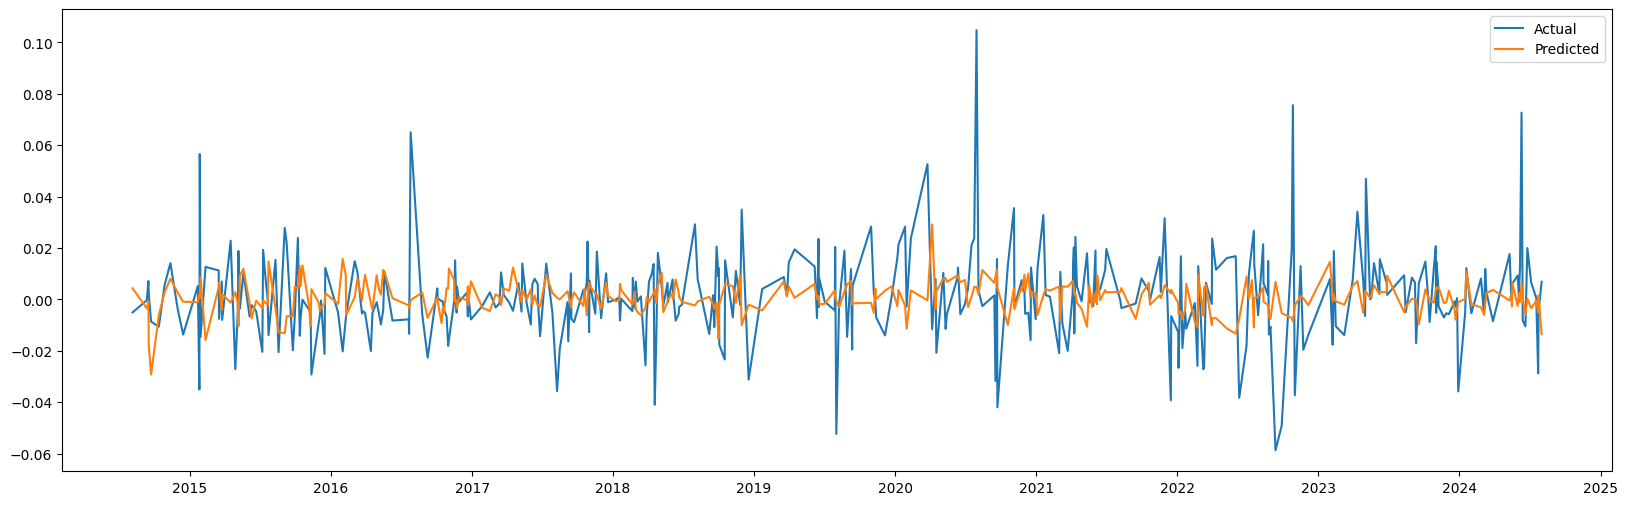

In [908]:
# Plot the predicted vs actual values
plt.figure(figsize=(20, 6))
plt.plot(y_test[target], label="Actual")
plt.plot(y_test["predicted"], label="Predicted")
plt.legend()
plt.show()

In [909]:
df_importance = pd.DataFrame()

importance_types = ["weight", "gain", "cover", "total_gain", "total_cover"]
for importance_type in importance_types:
    importance = model.get_booster().get_score(importance_type=importance_type)

    df_i = pd.DataFrame(importance.items(), columns=["feature", importance_type])

    if df_importance.empty:
        df_importance = df_i
    else:
        df_importance = pd.merge(df_importance, df_i, on="feature", how="outer")
df_importance


,feature,weight,gain,cover,total_gain,total_cover
0,adj close,57.0,0.000451,352.263153,0.025707,20079.0
1,close,64.0,0.000155,49.500000,0.009934,3168.0
2,day_of_month,50.0,0.000467,267.940002,0.023333,13397.0
3,day_of_week,26.0,0.000267,257.730774,0.006955,6701.0
4,dividends_event_decay,184.0,0.000233,66.119568,0.042898,12166.0
...,...,...,...,...,...,...
247,volume_lag_7,70.0,0.000354,164.585709,0.024770,11521.0
248,volume_lag_8,101.0,0.000439,367.782166,0.044336,37146.0
249,volume_lag_9,110.0,0.000540,433.645447,0.059364,47701.0
250,week_of_year,42.0,0.000669,106.285713,0.028094,4464.0


In [910]:
def normalize_column(data: pd.DataFrame, column: str | list) -> pd.DataFrame:
    if isinstance(column, str):
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    elif isinstance(column, list):
        for col in column:
            data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data

In [911]:
df_importance = normalize_column(df_importance, ["weight", "gain", "cover", "total_gain", "total_cover"])
df_importance

,date,open,high,low,close,adj close,volume,close_percent_change,dividends_event_value,dividends_event_name,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
0,2014-08-06,23.687500,23.870001,23.677500,23.740000,20.998869,154232000,-0.005055,0.0000,None,...,NaN,NaN,NaN,NaN,NaN,2,6,8,2014,32
1,2014-08-07,23.732500,23.987499,23.525000,23.620001,20.996649,186844000,0.002752,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,3,7,8,2014,32
2,2014-08-08,23.565001,23.705000,23.320000,23.684999,21.054420,167460000,0.013194,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,4,8,8,2014,32
3,2014-08-11,23.817499,24.020000,23.709999,23.997499,21.332216,146340000,-0.000208,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,0,11,8,2014,33
4,2014-08-12,24.010000,24.219999,23.902500,23.992500,21.327774,135180000,0.013233,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,1,12,8,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800,0.014991,0.2500,dividends,...,48983000.0,45057100.0,77305800.0,78569700.0,163224100.0,1,30,7,2024,31
2512,2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300,-0.016751,0.2500,dividends,...,50759500.0,48983000.0,45057100.0,77305800.0,78569700.0,2,31,7,2024,31
2513,2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000,0.006869,0.2500,dividends,...,72044800.0,50759500.0,48983000.0,45057100.0,77305800.0,3,1,8,2024,31
2514,2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600,-0.048167,0.2500,dividends,...,52393600.0,72044800.0,50759500.0,48983000.0,45057100.0,4,2,8,2024,31


<Axes: title={'center': 'Feature Importance'}, ylabel='feature'>

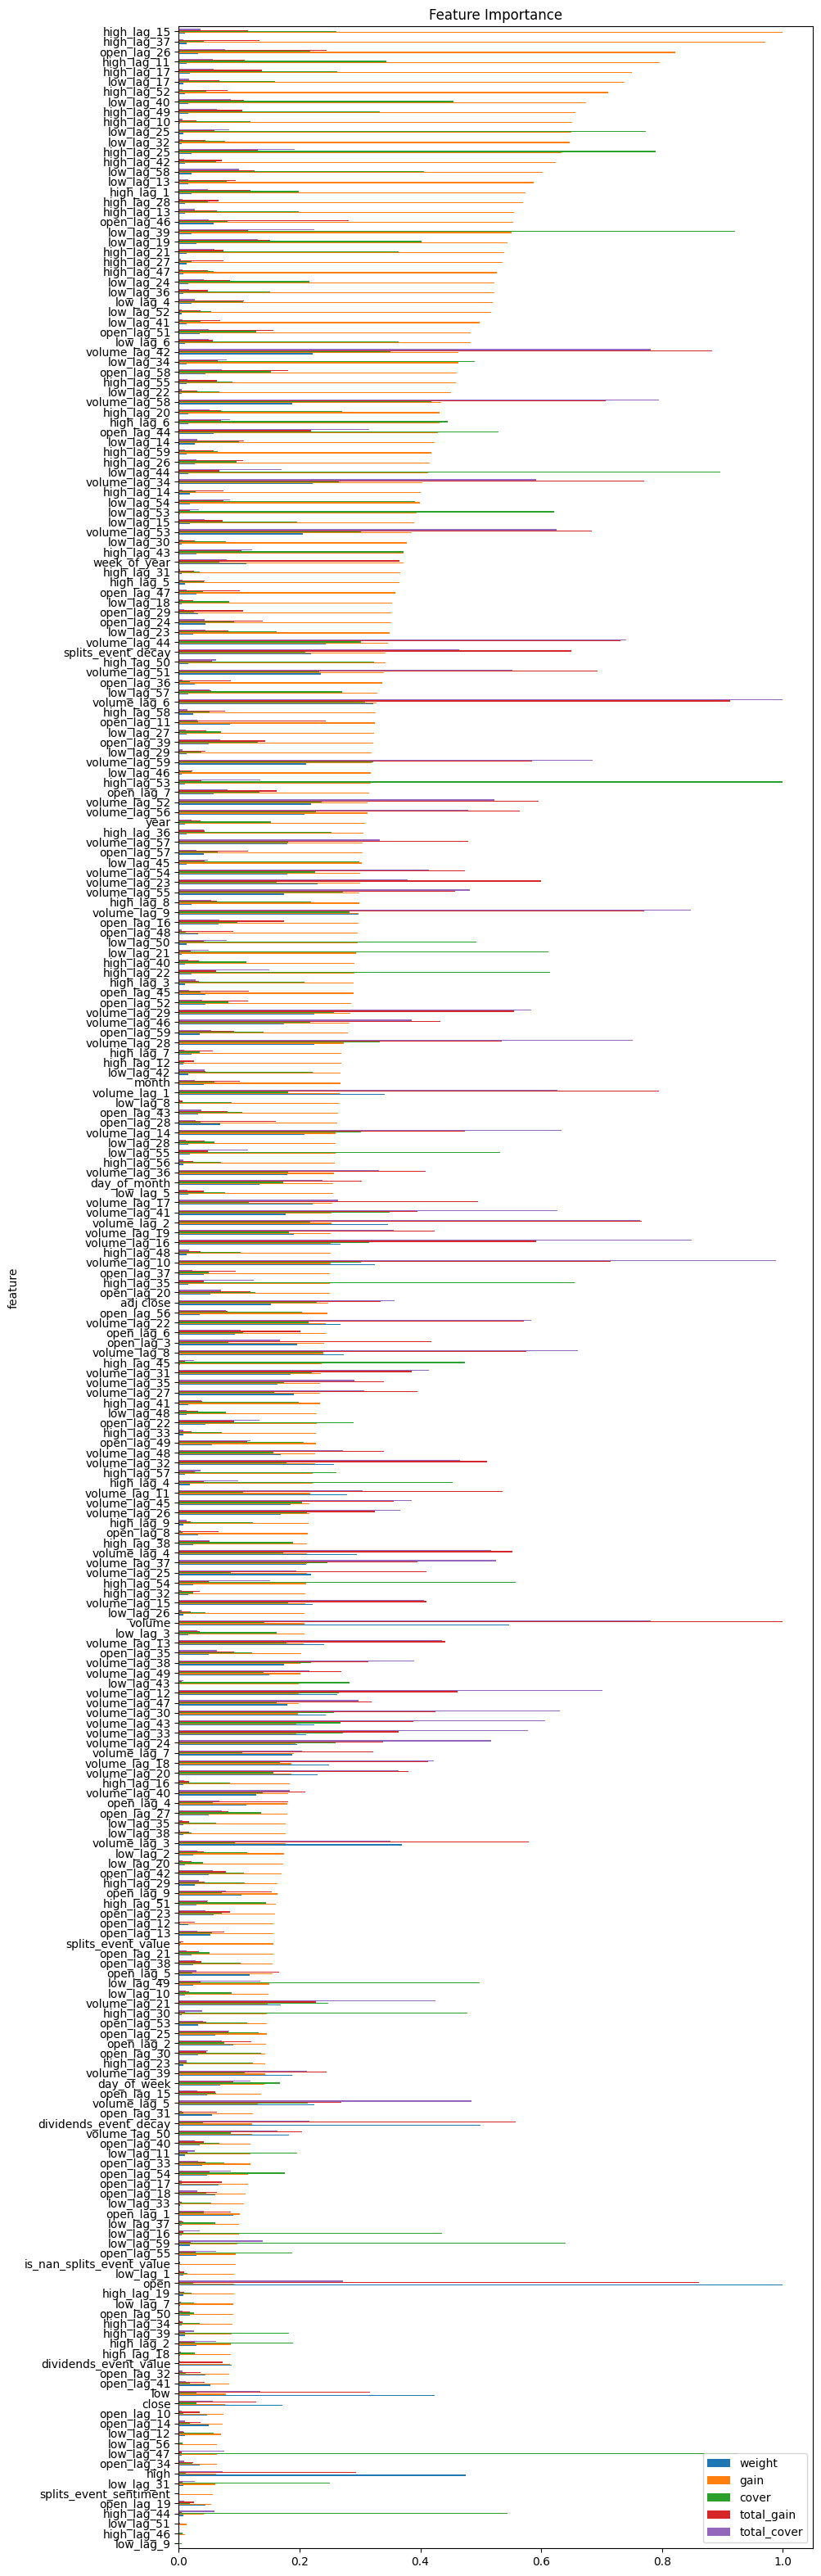

In [912]:
(
    df_importance
    .sort_values(by = "gain", ascending=True)
    .plot(kind="barh", x="feature", title="Feature Importance", figsize=( 10, 40))
)

# importance_df = pd.DataFrame(importance, columns=["feature", "importance"])
# importance_df.plot(kind="bar", x="feature", y="importance", title=importance_type, figsize=(20, 6))

# plt.show()